<a href="https://colab.research.google.com/github/sipocz/I4_0/blob/main/SolventRecovery_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [44]:
from google.colab import drive
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso

In [45]:
!pip install lazypredict

In [46]:
!wget "https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py"
!rm grafikon.py.*
from grafikon import grafikon

--2024-02-14 20:27:00--  https://raw.githubusercontent.com/sipocz/DataFrame_Graph/main/grafikon.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2539 (2.5K) [text/plain]
Saving to: ‘grafikon.py.1’

grafikon.py.1       100%[===================>]   2.48K  --.-KB/s    in 0s      

2024-02-14 20:27:00 (29.8 MB/s) - ‘grafikon.py.1’ saved [2539/2539]



In [47]:
drive.mount('/content/drive', readonly=False,force_remount=True )

Mounted at /content/drive


In [48]:
path="/content/drive/MyDrive/000_OLD_UZ"

In [49]:
fname="/all_data_2.csv"

In [50]:
dfx=pd.read_csv(path+fname,header=0)

In [51]:
dfx["time"]=pd.to_datetime(dfx["Unnamed: 0"], format="%Y-%m-%d %H:%M:%S")

In [52]:
del(dfx["Unnamed: 0"])

In [53]:
dfx.set_index("time", inplace=True)

In [54]:
dfx.head()

,AQ_T020F,AQ_T1201A,AQ_T120F,AQ_T230A,AQ_T230F,AQ_T340A,AQ_T340F,AQ_T460A,AQ_T460F,QK_F_TK,EXX_FIG101
time,,,,,,,,,,,
2023-01-02 06:16:00,23.78,17.83,4.90,12.66,23.57,12.86,29.33,12.08,28.13,5.92,0.56
2023-01-02 06:17:00,23.75,17.82,4.14,12.71,23.61,12.91,29.32,12.06,28.06,5.98,0.54
2023-01-02 06:18:00,23.75,17.81,3.23,12.67,23.62,12.88,29.32,12.11,28.11,5.98,0.48
2023-01-02 06:19:00,23.68,17.81,2.21,12.66,23.57,12.90,29.32,12.11,28.06,6.03,0.50
2023-01-02 06:20:00,23.74,17.81,23.84,12.67,23.62,12.93,29.29,12.12,28.11,6.03,0.56


In [55]:
dfx.head()

,AQ_T020F,AQ_T1201A,AQ_T120F,AQ_T230A,AQ_T230F,AQ_T340A,AQ_T340F,AQ_T460A,AQ_T460F,QK_F_TK,EXX_FIG101
time,,,,,,,,,,,
2023-01-02 06:16:00,23.78,17.83,4.90,12.66,23.57,12.86,29.33,12.08,28.13,5.92,0.56
2023-01-02 06:17:00,23.75,17.82,4.14,12.71,23.61,12.91,29.32,12.06,28.06,5.98,0.54
2023-01-02 06:18:00,23.75,17.81,3.23,12.67,23.62,12.88,29.32,12.11,28.11,5.98,0.48
2023-01-02 06:19:00,23.68,17.81,2.21,12.66,23.57,12.90,29.32,12.11,28.06,6.03,0.50
2023-01-02 06:20:00,23.74,17.81,23.84,12.67,23.62,12.93,29.29,12.12,28.11,6.03,0.56


In [56]:
X=dfx[['AQ_T020F','AQ_T1201A','AQ_T120F','AQ_T230A','AQ_T230F','AQ_T340A','AQ_T340F','AQ_T460A','AQ_T460F','QK_F_TK']]

In [57]:
y=dfx["EXX_FIG101"]

In [58]:
from lazypredict.Supervised import LazyRegressor

from sklearn.model_selection import train_test_split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X[:20000], y[:20000],test_size=.2,random_state =123)

In [72]:
lazy=LazyRegressor()

In [73]:
l_out=lazy.fit(X_train,X_test,y_train,y_test)

 98%|█████████▊| 41/42 [04:47<00:01,  1.80s/it]

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 16000, number of used features: 10
[LightGBM] [Info] Start training from score 0.877806


100%|██████████| 42/42 [04:47<00:00,  6.84s/it]


In [74]:
print(l_out)

(                               Adjusted R-Squared  R-Squared  RMSE  Time Taken
Model                                                                         
ExtraTreesRegressor                          0.99       0.99  0.06        4.12
RandomForestRegressor                        0.98       0.98  0.06       16.66
BaggingRegressor                             0.98       0.98  0.06        1.66
XGBRegressor                                 0.98       0.98  0.07        0.41
LGBMRegressor                                0.98       0.98  0.07        0.30
KNeighborsRegressor                          0.98       0.98  0.07        0.12
HistGradientBoostingRegressor                0.98       0.98  0.07        2.02
DecisionTreeRegressor                        0.97       0.97  0.08        0.31
ExtraTreeRegressor                           0.97       0.97  0.08        0.09
GradientBoostingRegressor                    0.94       0.94  0.11        5.20
MLPRegressor                                 0.91  

In [75]:
from sklearn.ensemble import HistGradientBoostingRegressor

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=.2,random_state =123)

In [85]:
hgbr=HistGradientBoostingRegressor(max_iter=800,verbose=0,max_leaf_nodes=100)

In [86]:
hgbr.fit(X_train,y_train)

HistGradientBoostingRegressor(max_iter=800, max_leaf_nodes=100)

In [87]:
y_pred=hgbr.predict(X)



In [88]:
hgbr_df=pd.DataFrame({"real":y,"predicted":y_pred})

In [101]:
# 1 hónap adata
h_data=30*24*60
print(len(hgbr_df))

490926


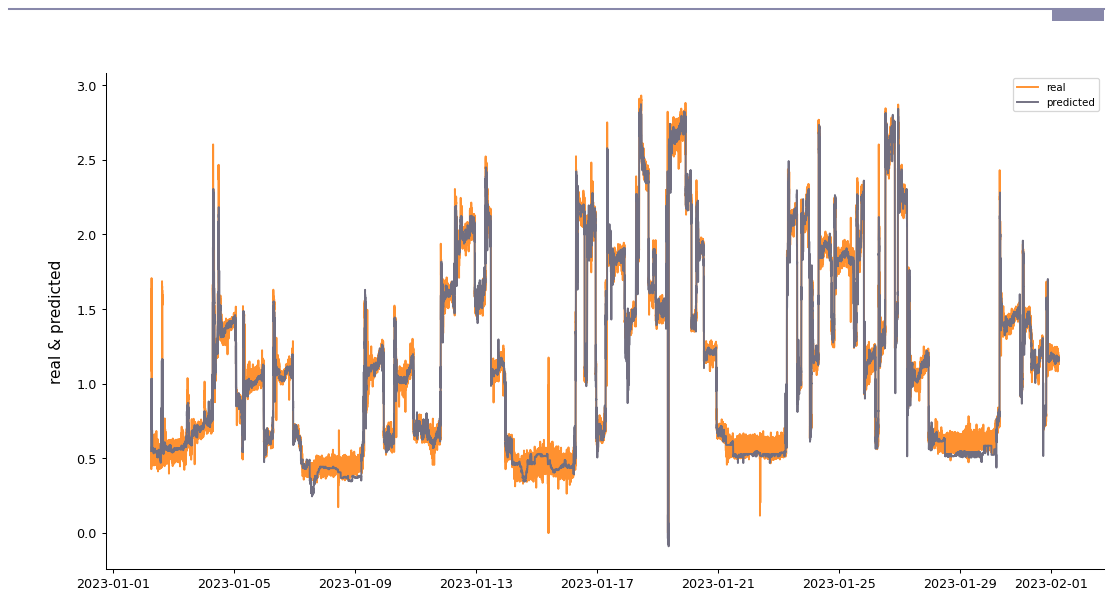

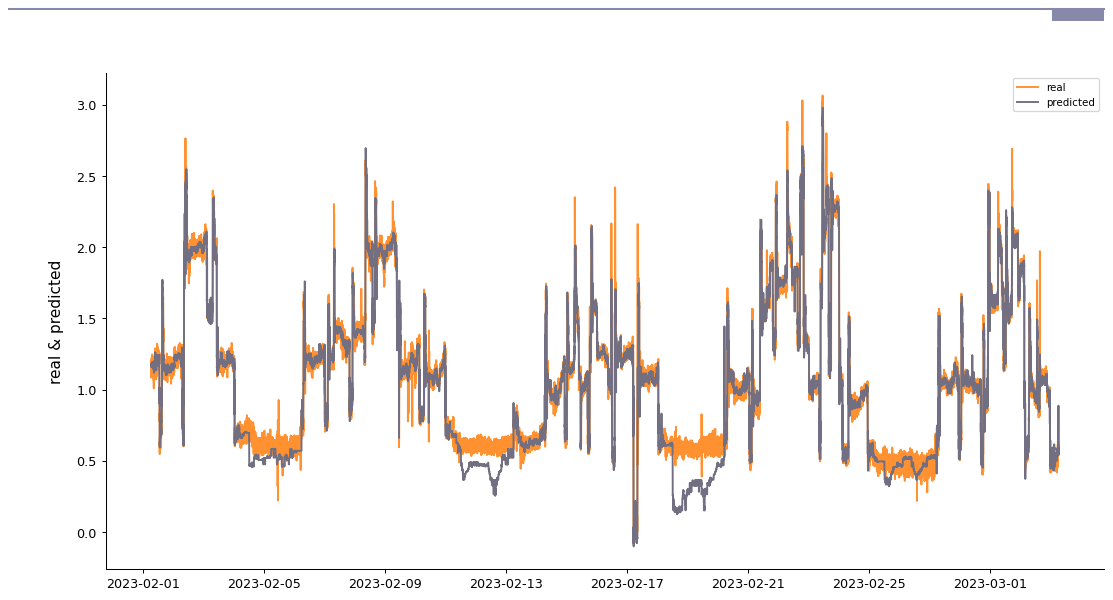

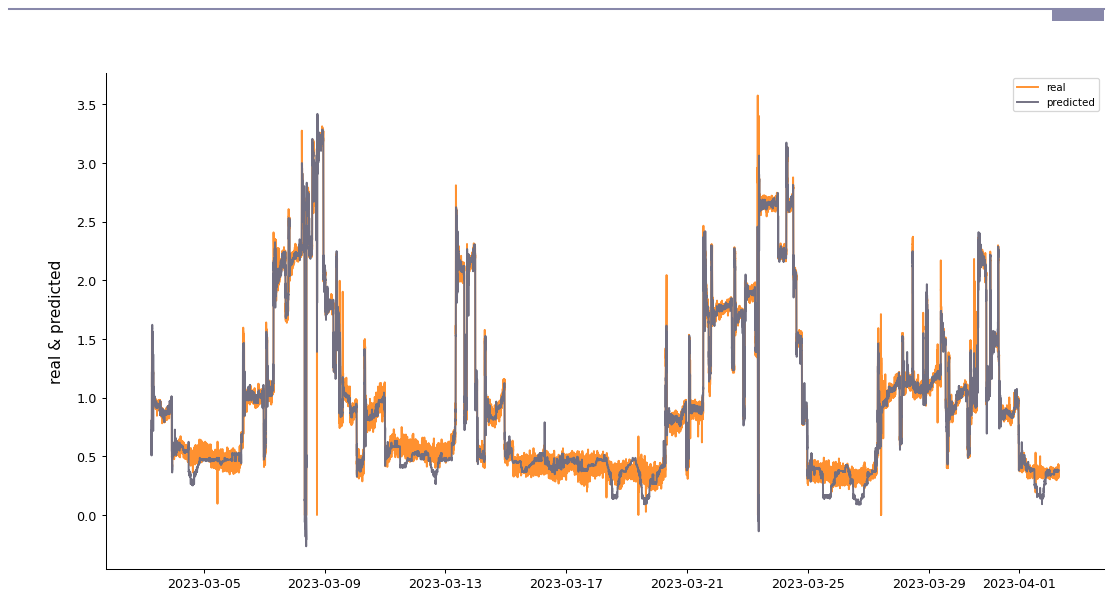

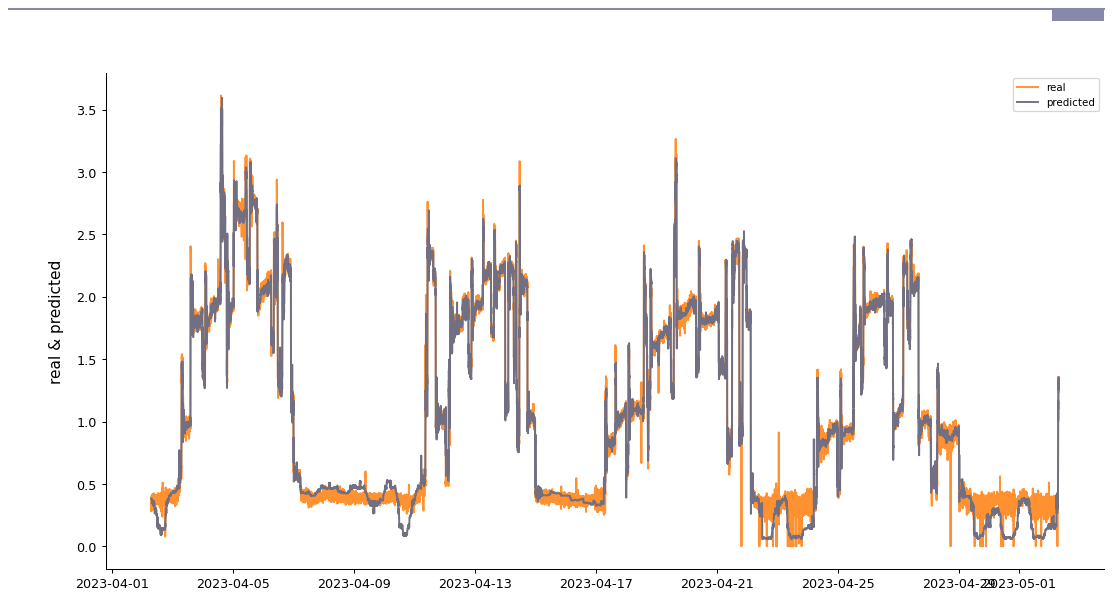

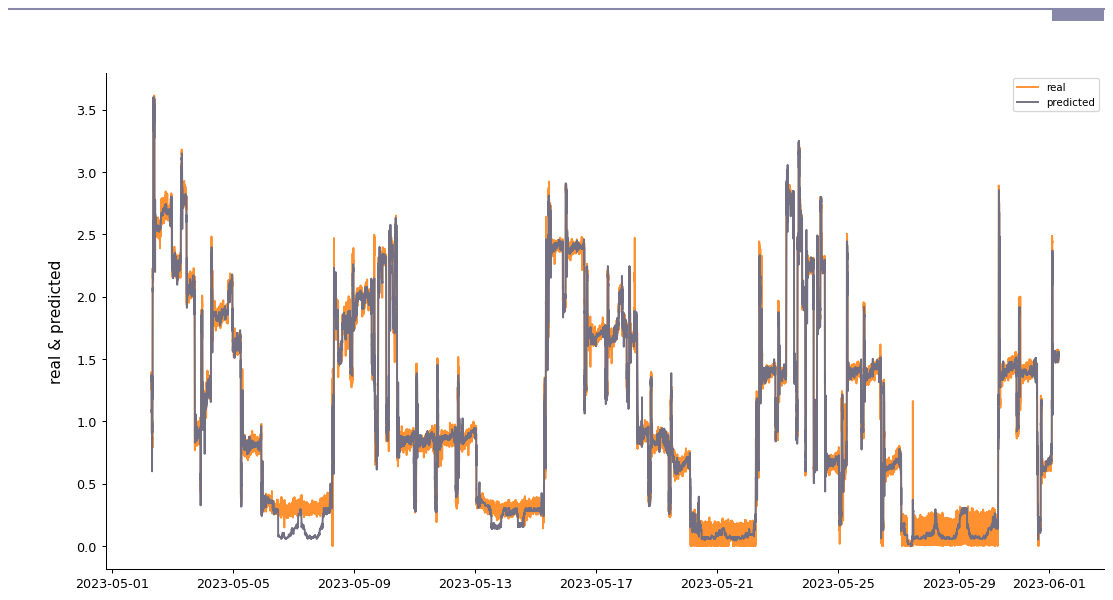

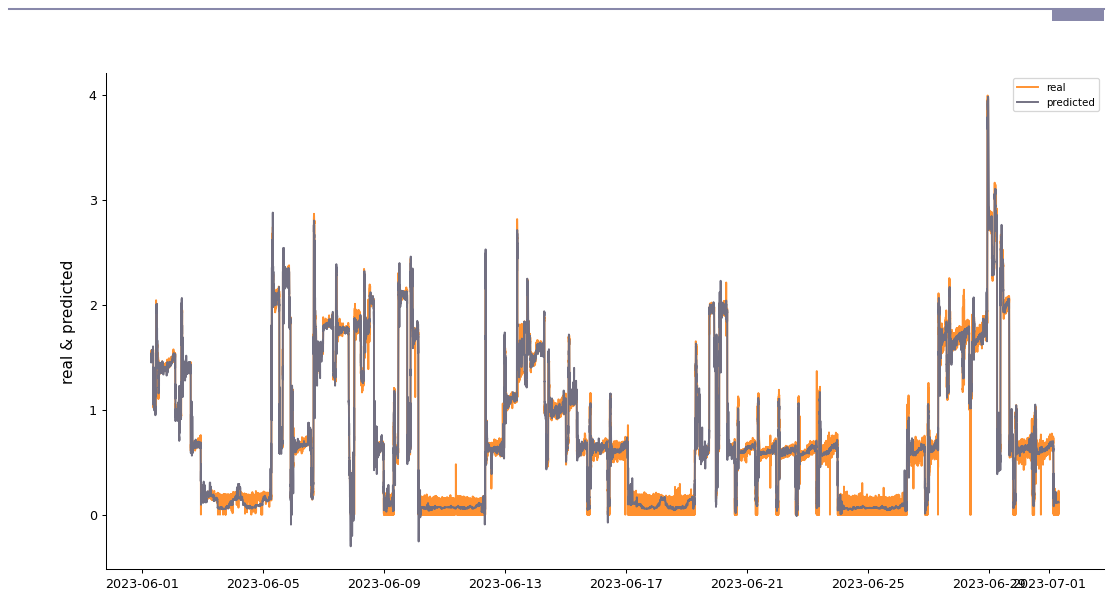

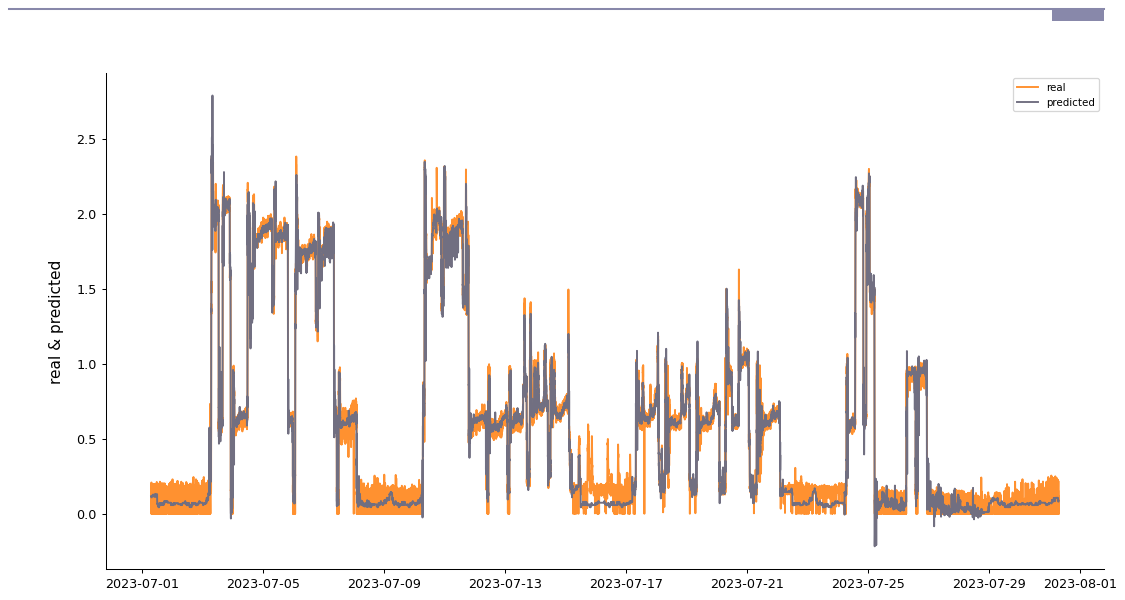

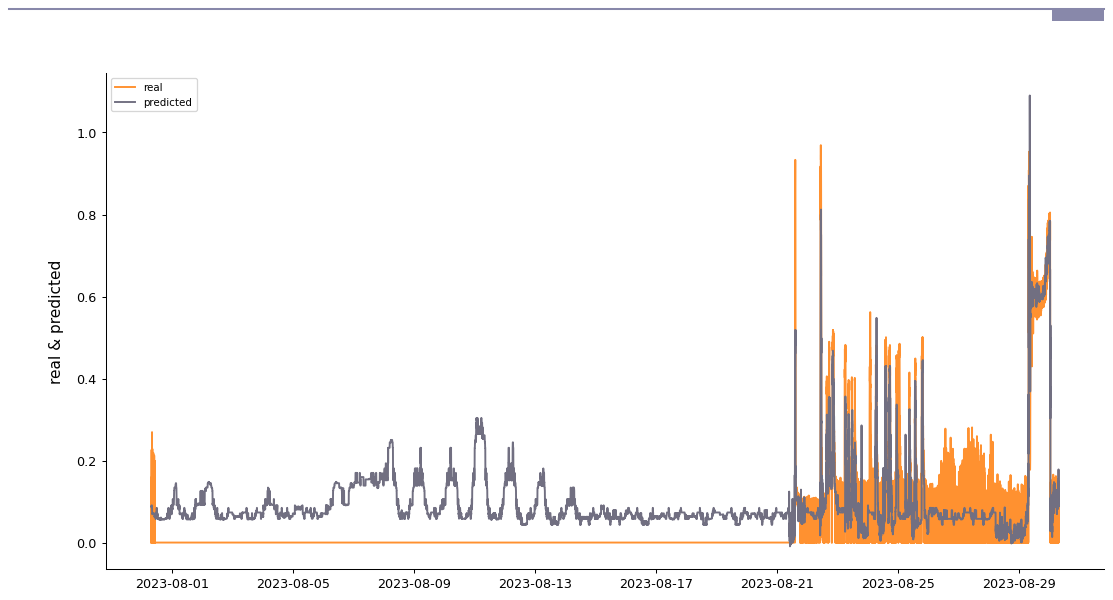

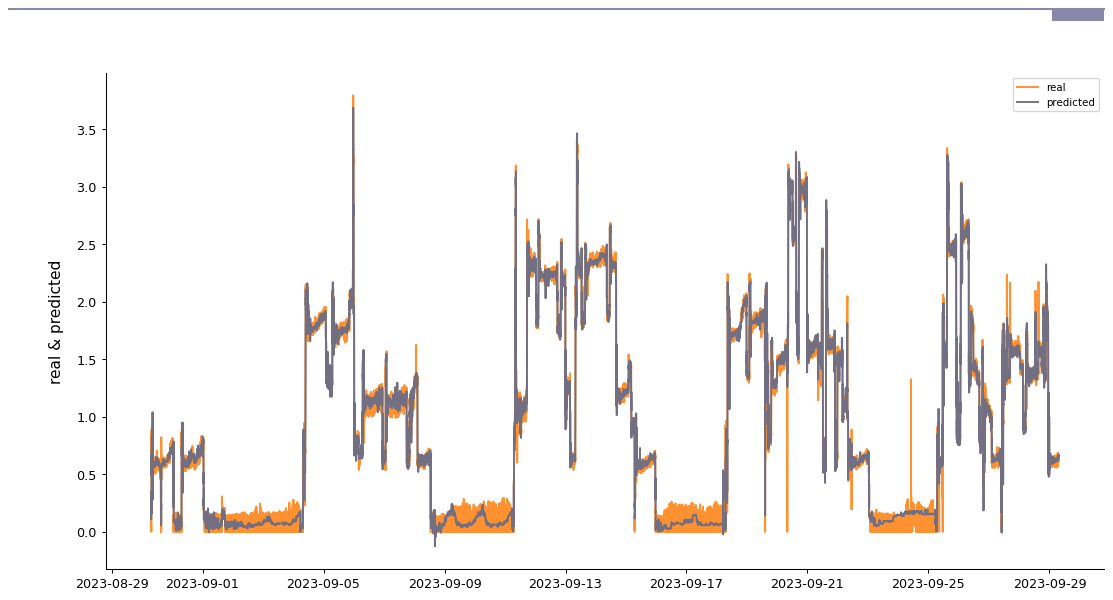

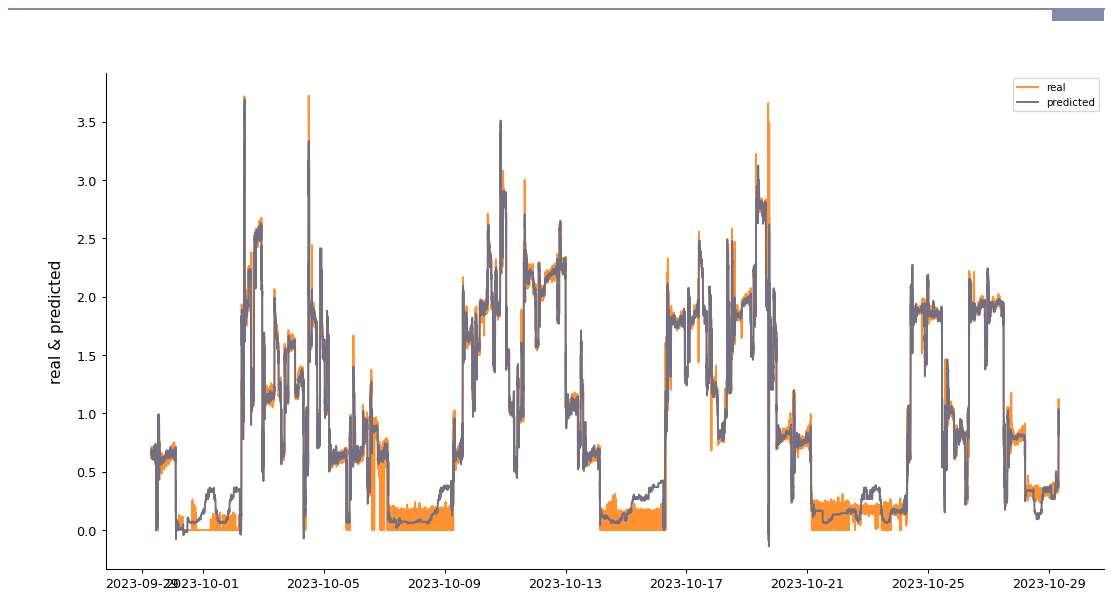

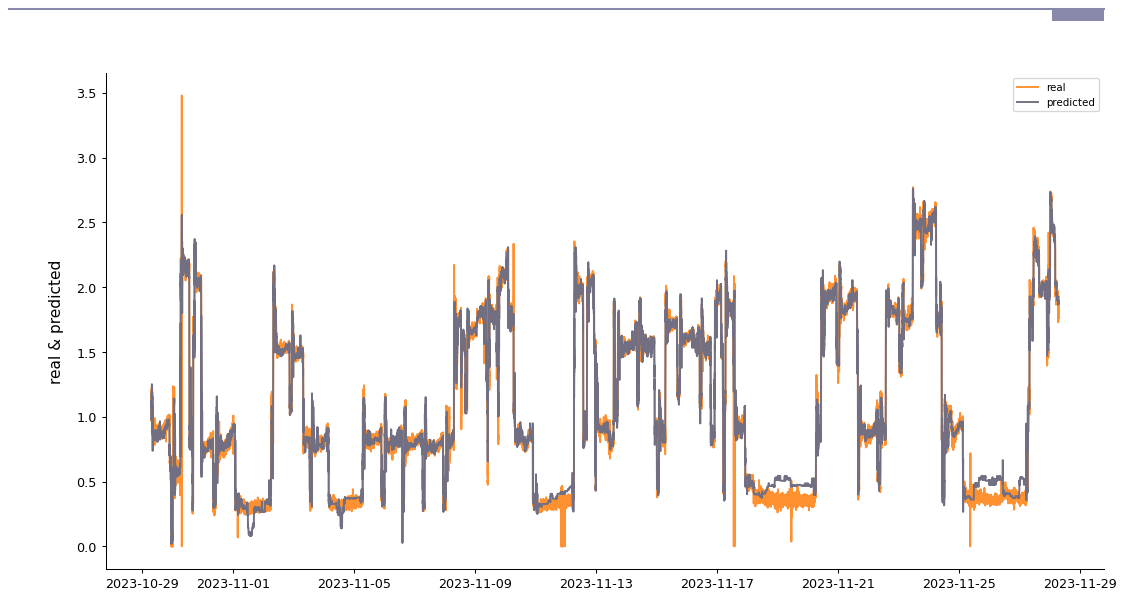

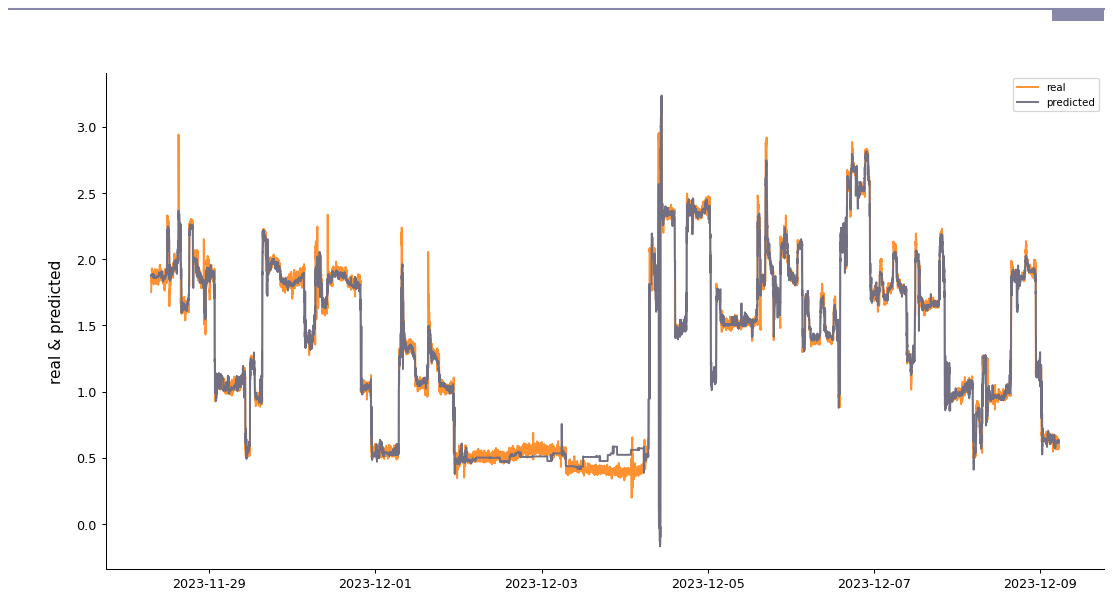

In [103]:
for i in range(12):
    grafikon(hgbr_df[i*h_data:(i+1)*h_data],"real","real","predicted","predicted", n_graf=2)

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.10/dist-packages/matplotlib/pyplot.py'>

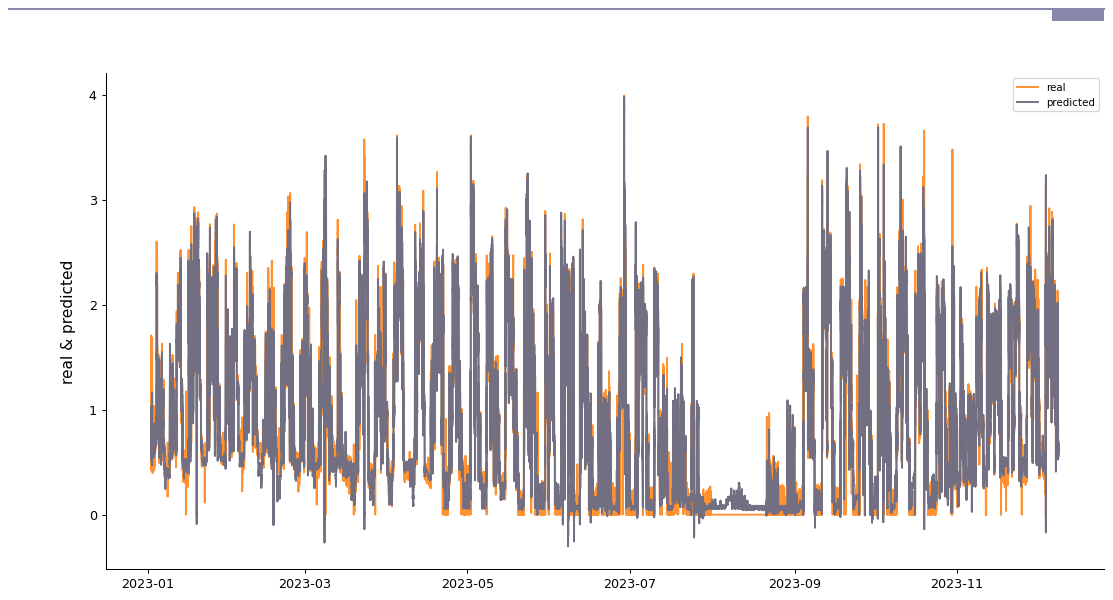

In [104]:
grafikon(hgbr_df[:],"real","real","predicted","predicted", n_graf=2)

In [81]:
#AQ_T020F	AQ_T1201A	AQ_T120F	AQ_T230A	AQ_T230F	AQ_T340A	AQ_T340F	AQ_T460A	AQ_T460F	QK_F_TK	EXX_FIG101

In [110]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [111]:
sns.set_theme(style="white")
corr=dfx.corr()

<Axes: >

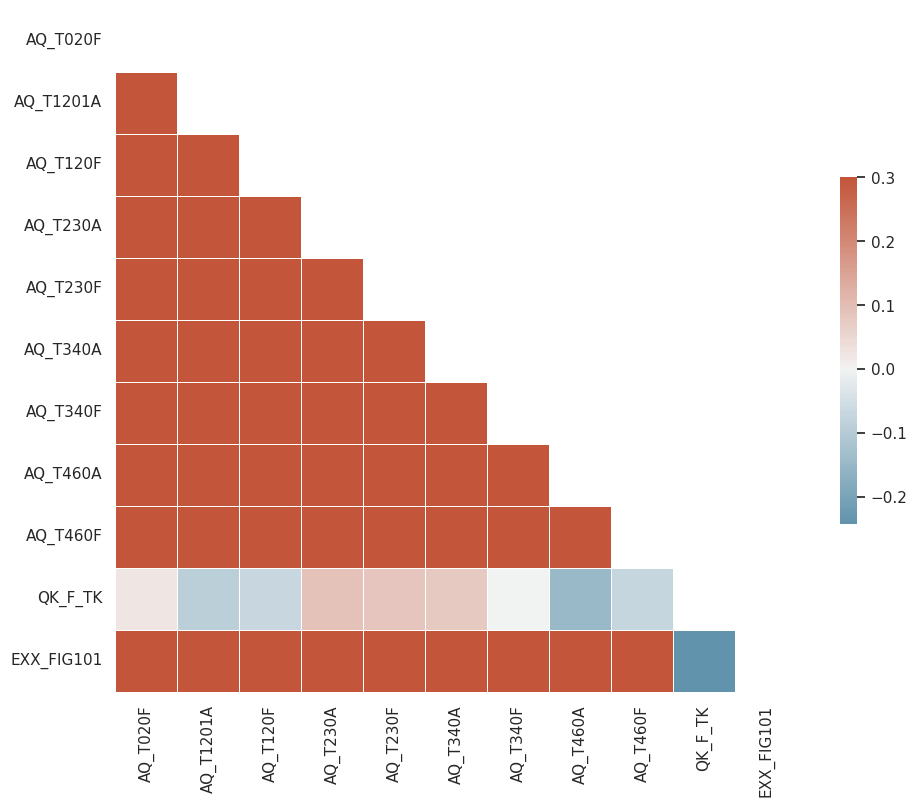

In [112]:
f, ax = plt.subplots(figsize=(11, 9))
mask = np.triu(np.ones_like(corr, dtype=bool))
# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})